** 1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)**

In [16]:
import pandas as pd
import numpy as np

In [17]:
batting= pd.read_csv("C:/Users/Aparna/Downloads/batting.csv")

** 2)Print out the dimensions and info about the dataframe you just created**

In [18]:
batting.shape

(102816, 25)

In [19]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

** 3)How many players have hit 40 or more HRs in one single season? (Number only)**

In [20]:
data3 = batting.groupby(['playerID', 'yearID'],as_index = False).sum()
len(data3[data3['HR']>=40].drop_duplicates('playerID'))

142

** 4)How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)**

In [21]:
data4 = batting.groupby(['playerID'],as_index = False).sum()               
df = batting[['playerID','nameFirst','nameLast']].drop_duplicates()
pd.merge(df,data4[data4['HR']>600][['playerID','HR']])

,playerID,nameFirst,nameLast,HR
0,ruthba01,Babe,Ruth,714
1,mayswi01,Willie,Mays,660
2,aaronha01,Hank,Aaron,755
3,bondsba01,Barry,Bonds,762
4,griffke02,Ken,Griffey,630
5,sosasa01,Sammy,Sosa,609
6,thomeji01,Jim,Thome,612
7,rodrial01,Alex,Rodriguez,696


**5)How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)**

In [22]:
data5 = batting.groupby(['playerID', 'yearID'],as_index = False).sum()
len(data5[(data5['2B']>=40)&(data5['3B']>=10)&(data5['H']>=200)&(data5['HR']>=30)].drop_duplicates('playerID'))

11

**6)How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )**

In [23]:
data6 = batting.groupby(['playerID','nameFirst','nameLast','yearID'],as_index = False).sum()
data6m=data6[data6['SB']>=100][['playerID','SB']].sort_values(by=['SB'],ascending=False)
df2 = batting[['playerID','nameFirst','nameLast','yearID']].drop_duplicates('playerID')
pd.merge(df2, data6m).sort_values(by=['SB'],ascending=False)


,playerID,nameFirst,nameLast,yearID,SB
3,nicolhu01,Hugh,Nicol,1881,138.0
14,henderi01,Rickey,Henderson,1979,130.0
1,lathaar01,Arlie,Latham,1880,129.0
13,brocklo01,Lou,Brock,1961,118.0
7,comisch01,Charlie,Comiskey,1882,117.0
0,wardjo01,John,Ward,1878,111.0
9,hamilbi01,Billy,Hamilton,1888,111.0
10,hamilbi01,Billy,Hamilton,1888,111.0
17,colemvi01,Vince,Coleman,1985,110.0
2,lathaar01,Arlie,Latham,1880,109.0


**8)Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)**

In [24]:
x=max(batting['HR'])
batting[batting['HR']==x]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
80752,bondsba01,Barry,Bonds,1964,2001,1,SFN,NL,153,476,...,137.0,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0


**9)Who had the most hits (H) in the 1970s? (Dataframe)**

In [25]:
mostH= batting[(batting['yearID']>=1970) & (batting['yearID']<1980)].groupby('playerID').sum()
mostH[mostH['H']==(mostH['H'].max())]

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,
rosepe01,19410,19745,10,1604,6523,1068,2045,394,64,79,580.0,105.0,60.0,783,464.0,87.0,50.0,9.0,34.0,111.0


**10)Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)**

In [26]:
H = batting[batting['yearID'] == 1977]
H1 = H.groupby(['playerID','nameFirst','nameLast'], as_index=False).sum()
H1['OBP'] = (H1['H'] + H1['BB'] + H1['HBP'])/(H1['AB']+H1['BB']+H1['HBP']+H1['SF'])
H1['PA'] = H1['AB'] + H1['BB'] + H1['HBP'] + H1['SH'] + H1['SF'] 
H1 = H1[H1['PA'] >=500].sort_values('OBP',ascending = False).head(5)
H1[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
135,Rod,Carew,0.448773
745,Ken,Singleton,0.437788
752,Reggie,Smith,0.426910
334,Mike,Hargrove,0.420312
580,Joe,Morgan,0.417054


**11)Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)**

In [27]:
H = batting[batting['yearID'] == 2013]
H1 = H.groupby(['playerID','nameFirst','nameLast'], as_index=False).sum()
H1['Average'] = H1['H']/H1['AB']
H1['PA'] = H1['AB'] + H1['BB'] + H1['HBP'] + H1['SH'] + H1['SF'] 
H1 = H1[H1['PA'] >=300].sort_values('Average',ascending = False).head(8)
H1[['nameFirst','nameLast','Average']]

,nameFirst,nameLast,Average
167,Miguel,Cabrera,0.347748
980,Hanley,Ramirez,0.345395
269,Michael,Cuddyer,0.331288
759,Joe,Mauer,0.323596
1196,Mike,Trout,0.322581
595,Chris,Johnson,0.321012
398,Freddie,Freeman,0.319419
962,Yasiel,Puig,0.319372


**12)Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)**

In [28]:
data12= batting[(batting['yearID'] >= 1940)&(batting['yearID'] <=1949)]
data12 = data12.groupby('playerID', as_index=False).agg({'nameFirst':'first', 'nameLast' : 'first','H' :'sum'})
data12.sort_values('H',ascending=False).head(5)

,playerID,nameFirst,nameLast,H
138,boudrlo01,Lou,Boudreau,1578
427,elliobo01,Bob,Elliott,1563
1576,walkedi02,Dixie,Walker,1512
1103,musiast01,Stan,Musial,1432
390,doerrbo01,Bobby,Doerr,1407


**13)Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)**

In [29]:
year_c=batting.groupby('yearID',as_index=False).agg({'H' :'max'})
df = batting[['playerID','nameFirst','nameLast','yearID']].drop_duplicates()
mosthits=pd.merge(df,year_c)[['nameFirst','nameLast','yearID','H']]
mosthits = mosthits.groupby('nameFirst','nameLast', as_index=False).agg({'H' :'count'})
mosthits.sort_values('H',ascending=False).head(5)


ValueError: No axis named nameLast for object type <class 'pandas.core.frame.DataFrame'>

**Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe**

In [30]:
batting1 = batting.groupby(['playerID'],as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', 'G' : 'sum'})
batting1= batting1.sort_values('G',ascending =False).reset_index().head(5)
batting1[['nameFirst','nameLast','G']]

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


**15)How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here**

In [31]:

batting15 = batting.groupby('playerID').sum()
len(batting15[(batting15['H'] >=3000) & (batting15['HR']>=500)])

5

**16)How many HRs were hit during the entire 1988 season?  Just a number is okay here**

In [32]:
batting16 = batting[batting['yearID'] == 1988][['yearID','HR']]
batting16['HR'].sum()

3180

**17)Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average**

In [33]:
filter = batting[(batting['nameFirst'] == "Wade") & (batting['nameLast'] == "Boggs")]
out17 = filter[filter['AB'] >=500]
out17['average'] = out17['H']/out17['AB']
out_17=out17[['nameFirst','nameLast','average']]
out_17.sort_values('average',ascending = False).head(3)

C:\Users\Aparna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nameFirst,nameLast,average
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


**18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP**

In [34]:
H1 = batting
H1['OBP'] = (H1['H'] + H1['BB'] + H1['HBP'])/(H1['AB']+H1['BB']+H1['HBP']+H1['SF'])
H1['PA'] = H1['AB'] + H1['BB'] + H1['HBP'] + H1['SH'] + H1['SF'] 
H1 = H1[(H1['yearID'] == 1995) & (H1['PA'] >=400)].sort_values('OBP', ascending = False).head(10).reset_index()
H1[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


**19)Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs**

In [35]:
out9 = batting[(batting['yearID'] == 1922) |(batting['yearID'] == 1925) |(batting['yearID'] == 1926)|(batting['yearID']==1928)]
out9 = out9.groupby(['yearID','playerID'],as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', '3B' : 'sum'}).sort_values('3B', ascending = False)
out9 = out9.groupby('yearID', as_index=False).first()
out9[['yearID','nameFirst','nameLast','3B']]

,yearID,nameFirst,nameLast,3B
0,1922,Jake,Daubert,22
1,1925,Kiki,Cuyler,26
2,1926,Paul,Waner,22
3,1928,Earle,Combs,21


** 20)How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here**

In [36]:
    data20 = batting.groupby(['playerID', 'yearID'],as_index = False).sum()
    out20=data20[(data20['HR']>=30) &(data20['SB']>=30)]
    len((out20).drop_duplicates('playerID'))

38

**21)Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP**

In [37]:
batting1=batting
batting2 = batting1.groupby(['yearID','playerID'], as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', 'AB' : 'sum','OBP':'sum'})
batting2= batting2[(batting2['yearID'] == 1986) & (batting2['AB'] >=400)]
batting2 = batting2.sort_values('OBP', ascending = False).head(1)
batting2[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
58871,Bobby,Bonilla,0.702937


**22)Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)**

In [38]:
batting22=batting
batting22o = batting22.groupby(['yearID','playerID','lgID'], as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first','OBP':'sum'})
batting22o = batting22o[(batting22o['yearID'] == 1997) & (batting22o['lgID'] =='NL')]
batting22o = batting22o.sort_values('OBP', ascending = False)
batting[['nameFirst','nameLast','OBP']].head(3)

,nameFirst,nameLast,OBP
0,Frank,Abercrombie,NaN
1,Bob,Addy,NaN
2,Art,Allison,NaN


**23)Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)**

In [30]:
out23 = batting[batting['yearID'] ==2012] 
out23 = out23.groupby(['yearID','playerID', 'nameFirst', 'nameLast'], as_index= False).sum()
out23 = out23[(out23['HR'] > batting['HR'].mean()) & (out23['AB']>= 500)].sort_values(['HR'], ascending = False)
out23[['nameFirst', 'nameLast', 'HR']]

,nameFirst,nameLast,HR
156,Miguel,Cabrera,44
481,Josh,Hamilton,43
451,Curtis,Granderson,43
348,Edwin,Encarnacion,42
331,Adam,Dunn,41
119,Ryan,Braun,41
82,Adrian,Beltre,36
1255,Josh,Willingham,35
130,Jay,Bruce,34
277,Chris,Davis,33


**24)Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)**

In [8]:
batting1 = batting.groupby(['playerID', 'yearID'], as_index = False).sum()   
title = batting[['playerID','nameFirst','nameLast','birthYear']].drop_duplicates()
batting1 = batting1[batting1['HR']>=50]
pd.merge(title,batting1[batting1['birthYear']==max(batting1['birthYear'])][['playerID','HR']])

,playerID,nameFirst,nameLast,birthYear,HR
0,mcgwima01,Mark,McGwire,1963,58


**25)Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)**

In [42]:
batting25 =batting
batting25['Age'] = batting25['yearID'] - batting25['birthYear']
batting25 = batting25.groupby(['playerID','yearID'],as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first','Age':'first','HR':'sum'})
batting25['THR'] = batting25.groupby(['playerID', 'nameFirst', 'nameLast'], as_index= False)['HR'].cumsum()
batting25[(batting25['THR'] >=300)].sort_values(['Age','THR']).head(5)

,playerID,yearID,nameFirst,nameLast,Age,HR,THR
43074,jonesan01,2005,Andruw,Jones,28,51,301
27852,foxxji01,1935,Jimmie,Foxx,28,36,302
64767,ottme01,1937,Mel,Ott,28,31,306
69369,pujolal01,2008,Albert,Pujols,28,37,319
73216,rodrial01,2003,Alex,Rodriguez,28,47,345


**BONUS:  Graph total HRs per season using bar graph**

In [11]:
batting= pd.read_csv("C:/Users/Aparna/Downloads/batting.csv")

Populating the interactive namespace from numpy and matplotlib


C:\Users\Aparna\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['bar']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


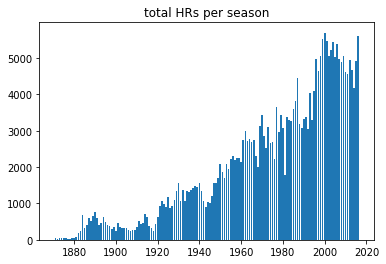

In [12]:
import matplotlib.pyplot as plt
%pylab inline
bar = batting.groupby('yearID', as_index= False).sum()
plt.bar(bar['yearID'], bar['HR'])
plt.title('total HRs per season')
plt.show()

**Using a line graph please graph the average HRs per AB per season**

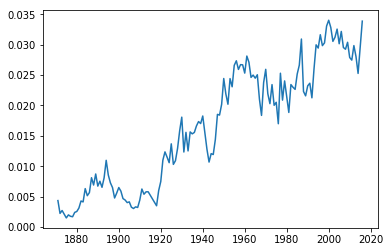

In [13]:
import matplotlib.pyplot as plt
lplot = batting.groupby('yearID',as_index= False).sum()

lplot['AverageHR'] = lplot['HR']/lplot['AB']
plt.plot(lplot['yearID'], lplot['AverageHR'])

